In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:/Users/sherv/Downloads/Elevate Labs/AI & ML Internship/Task 8/Mall_Customers.csv")

In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df_numeric = df.drop(columns=['CustomerID', 'Gender'], errors='ignore')

In [5]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [6]:
# Dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

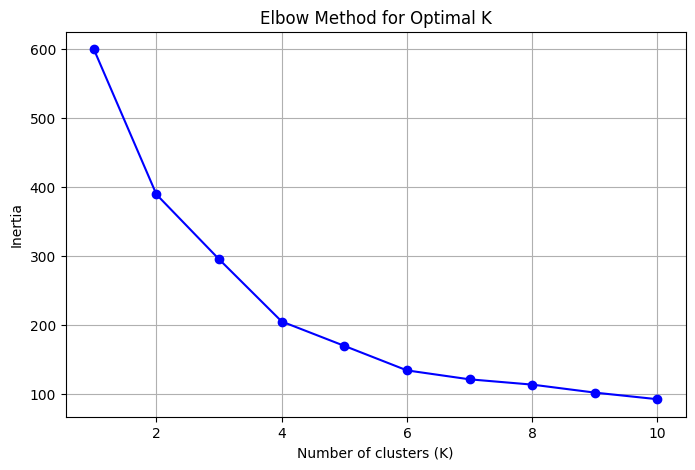

In [7]:
# -------- Elbow Method to find optimal K --------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [8]:
# -------- Fit KMeans with optimal K (let’s say 5 based on Elbow) --------
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Add cluster labels to the PCA dataframe
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

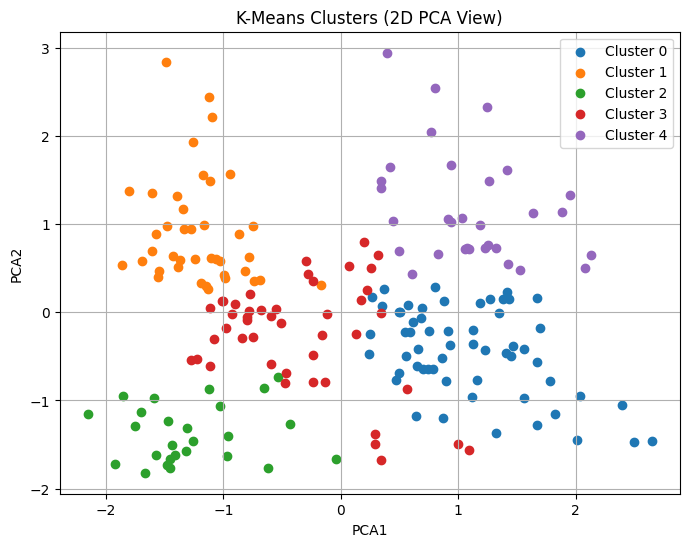

In [10]:
# -------- Visualize Clusters --------
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clusters (2D PCA View)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# -------- Evaluate with Silhouette Score --------
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=5: 0.408
